# Camera Calibration

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html#calibration

## Import Modules

In [3]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

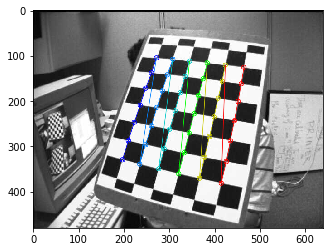

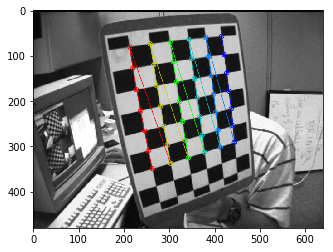

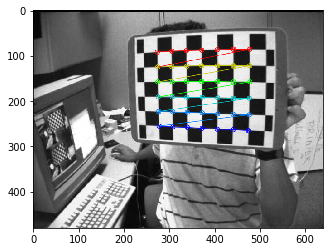

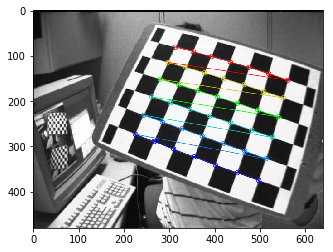

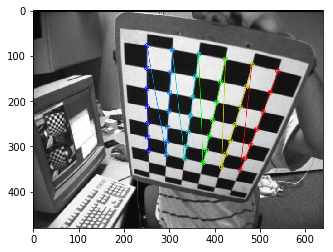

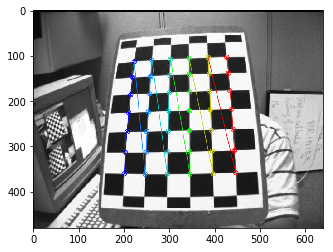

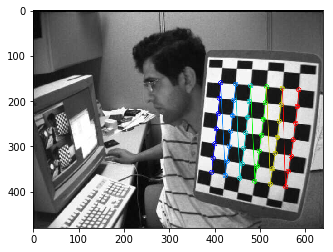

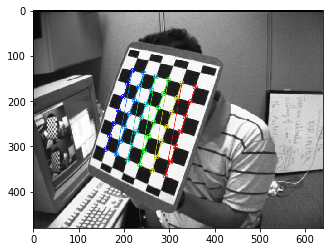

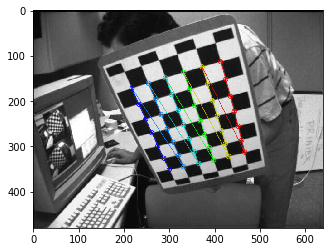

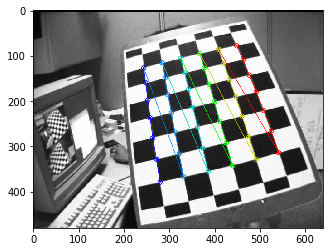

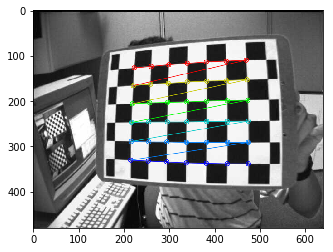

In [5]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('img/left*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        plt.imshow(img)
        plt.show()

In [6]:
objpoints

[array([[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [6., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [6., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [6., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [6., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [6., 4., 0.],
        [0., 5., 0.],
        [1., 5., 0.],
        [2., 5., 0.],
        [3., 5., 0.],
        [4., 5., 0.],
        [5., 5., 0.],
        [6., 5., 0.]], dtype=float32), array([[0., 0., 0.],
        [1., 0., 0.],
        [2., 0.,

In [7]:
imgpoints

[array([[[197.02638 , 328.5431  ]],
 
        [[209.90607 , 287.19135 ]],
 
        [[223.04529 , 246.69891 ]],
 
        [[235.749   , 208.50911 ]],
 
        [[248.32812 , 172.18303 ]],
 
        [[260.63873 , 137.68285 ]],
 
        [[272.3971  , 105.498   ]],
 
        [[235.35718 , 338.7629  ]],
 
        [[247.94786 , 295.75125 ]],
 
        [[260.59964 , 254.46184 ]],
 
        [[273.30807 , 214.45245 ]],
 
        [[285.18115 , 177.08664 ]],
 
        [[296.48145 , 141.69705 ]],
 
        [[307.7247  , 108.382835]],
 
        [[276.8669  , 349.24094 ]],
 
        [[289.16248 , 304.80563 ]],
 
        [[301.04785 , 262.0377  ]],
 
        [[313.22626 , 220.97003 ]],
 
        [[324.36545 , 182.30707 ]],
 
        [[335.13208 , 145.78882 ]],
 
        [[344.94873 , 112.25663 ]],
 
        [[321.0128  , 359.7385  ]],
 
        [[332.55573 , 314.10876 ]],
 
        [[343.8814  , 270.03006 ]],
 
        [[355.26526 , 227.82095 ]],
 
        [[365.43808 , 188.25327 ]],
 
        [[37

## Calibration

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

### camera matrix

In [9]:
mtx

array([[534.07088369,   0.        , 341.53407488],
       [  0.        , 534.11914598, 232.94565298],
       [  0.        ,   0.        ,   1.        ]])

### distortion coefficients

In [10]:
dist

array([[-2.92971638e-01,  1.07706979e-01,  1.31038388e-03,
        -3.11020449e-05,  4.34797714e-02]])

## Undistortion

In [17]:
img = cv2.imread('img/left12.jpg')

h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

### 1. Using cv2.undistort()

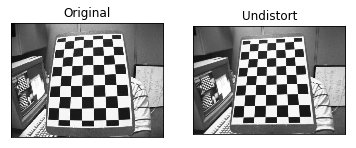

In [22]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Undistort')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Using remapping

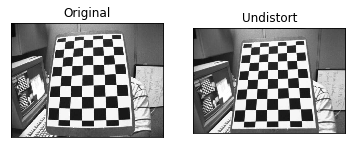

In [23]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Undistort')
plt.xticks([]), plt.yticks([])
plt.show()